In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sb
import yfinance as yf

DEFAULT_START = dt.date.isoformat(dt.date.today() - dt.timedelta(365))
DEFAULT_END = dt.date.isoformat(dt.date.today())

In [15]:
class Stock:
    def __init__(self, symbol, start=DEFAULT_START, end=DEFAULT_END):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.data = self.get_data()


    def get_data(self):
    
        data = yf.download(self.symbol, start=self.start, end=self.end)
        self.calc_returns(data)
        return data

    
    def calc_returns(self, df):

        df['Difference'] = df['Close'].diff()
        df['Inst. Returns'] = np.log(df['Close']).diff().round(4)
        
    
    def plot_return_dist(self):
    
        self.data['Inst. Returns'].hist()
        plt.title(f"Instantaneous Return Distribution for {self.symbol}")
        plt.xlabel("Returns")
        plt.ylabel("Recurrence")
        plt.show()


    def plot_performance(self):
        normal = (self.data['Close'] / self.data['Close'].iloc[0]) * 100
        normal.plot()
        plt.title(f"Performance of {self.symbol}")
        plt.xlabel("Date")
        plt.ylabel("Closing Price")
        plt.show()

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-02-14  191.940002  209.820007  189.440002  209.250000  209.250000   
2023-02-15  211.759995  214.660004  206.110001  214.240005  214.240005   
2023-02-16  210.779999  217.649994  201.839996  202.039993  202.039993   
2023-02-17  199.990005  208.440002  197.500000  208.309998  208.309998   
2023-02-21  204.990005  209.710007  197.220001  197.369995  197.369995   
...                ...         ...         ...         ...         ...   
2024-02-07  188.179993  189.789993  182.679993  187.580002  187.580002   
2024-02-08  189.000000  191.619995  185.580002  189.559998  189.559998   
2024-02-09  190.179993  194.119995  189.479996  193.570007  193.570007   
2024-02-12  192.110001  194.729996  187.279999  188.130005  188.130005   
2024-02-13  183.990005  187.259995  182.110001  184.020004  184.020004   

               Volume  Difference  In

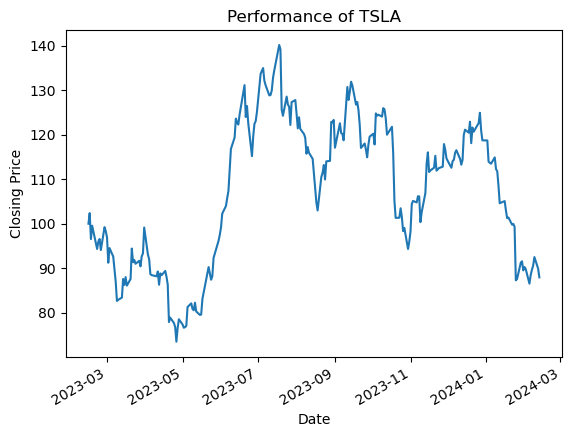

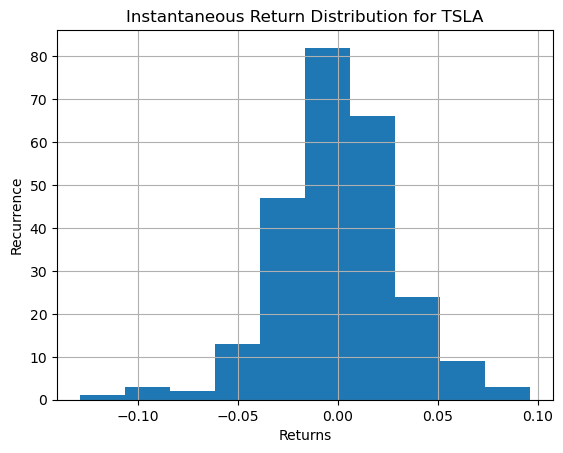

In [18]:
def main():
    
    test = Stock("TSLA")
    print(test.data)
    test.plot_performance()
    test.plot_return_dist()
    

if __name__ == '__main__':
    main() 